<a href="https://colab.research.google.com/github/nicoussj/MachineLearning/blob/main/Modelo_de_regresi%C3%B3n_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

##Dataset

In [ ]:
# Subir archivo
uploaded = files.upload()
for fn in uploaded.keys():
    name = fn

# Leer CSV
df = pd.read_csv(name, sep=';', encoding='latin1')
df.columns = df.columns.str.replace(';', '')

# Limpiar columnas no necesarias
df = df.drop(columns=['Unnamed: 0', 'AbnormalMatch'], errors='ignore')

# Corregir valores erróneos manuales si existen
df['RoundWinner'] = df['RoundWinner'].replace('False4', 'False')
df['MatchWinner'] = df['MatchWinner'].fillna('False')

# Convertir a binario
df['RoundWinner'] = df['RoundWinner'].astype(str).map({'True': 1, 'False': 0})
df['MatchWinner'] = df['MatchWinner'].astype(str).map({'True': 1, 'False': 0})
df['Survived'] = df['Survived'].astype(str).map({'True': 1, 'False': 0})

# Convertir columnas numéricas que vienen con formato incorrecto
features = ['TimeAlive', 'TravelledDistance', 'RoundKills', 'MatchKills', 'RoundAssists', 'MatchAssists', 'RoundHeadshots']

for col in features:
    df[col] = df[col].astype(str).str.replace('.', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar filas con datos inválidos
df = df.dropna(subset=features + ['RoundWinner'])


Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022 (3).csv


##Modelo de Regresión Logística Binaria con Curva Roc.

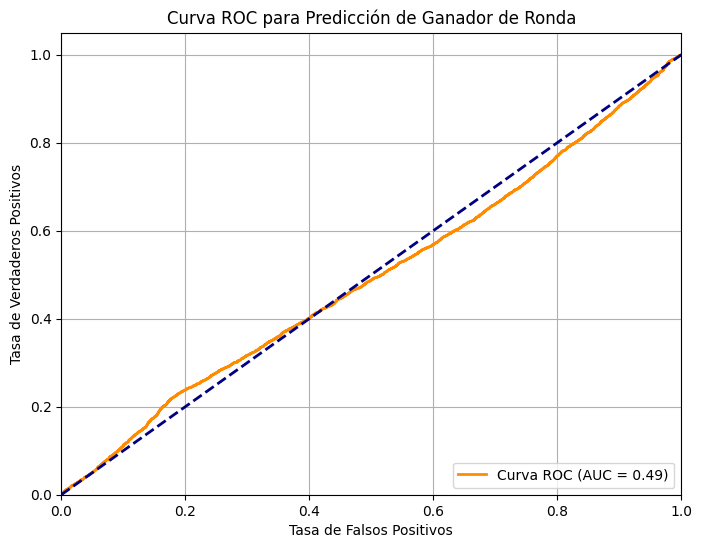

In [ ]:
# Variables predictoras y objetivo
X = df[features]
y = df['RoundWinner'].astype(int)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predecir probabilidades
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Predicción de Ganador de Ronda')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


##Probabilidad promedio de Ganador por ronda

In [ ]:
if 'Team' in df.columns:
    df_test = df.loc[X_test.index].copy()
    df_test['Predicted_Win_Prob'] = y_pred_proba
    equipo_prob = df_test.groupby('Team')['Predicted_Win_Prob'].mean().sort_values(ascending=False)

    print("\nProbabilidad promedio predicha de ganar ronda por equipo:")
    print(equipo_prob)
else:
    print(" No se encontró la columna 'Team'. Agrega esta columna si quieres comparar equipos.")



Probabilidad promedio predicha de ganar ronda por equipo:
Team
Terrorist           0.507192
CounterTerrorist    0.507189
Name: Predicted_Win_Prob, dtype: float64


##Métricas Binarias

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Obtener predicciones binarias usando un umbral de 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print("Métricas del Modelo de Clasificación Binaria:\n")
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print("\nMatriz de Confusión:")
print(cm)

# También puedes usar un resumen completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=["No Gana Ronda", "Gana Ronda"]))


Métricas del Modelo de Clasificación Binaria:

Accuracy:  0.50
Precision: 0.50
Recall:    1.00
F1 Score:  0.67

Matriz de Confusión:
[[   0 7882]
 [   0 7949]]

Reporte de Clasificación:
               precision    recall  f1-score   support

No Gana Ronda       0.00      0.00      0.00      7882
   Gana Ronda       0.50      1.00      0.67      7949

     accuracy                           0.50     15831
    macro avg       0.25      0.50      0.33     15831
 weighted avg       0.25      0.50      0.34     15831

